<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> RNN for Time Series </h2> </html>


RNNs are used for sequence modelling. This tutorial will look at time series data to be modelled and predicted using RNNs.

In [ ]:
# Import Libraries (pandas, numpy, matplotlib)

# ....
# ...
# ...


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data

We will use retail data for time-series modeling.

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, January 25, 2025.



##### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

_________________![image.png](attachment:d2f728cb-4c14-4ede-9ca4-3210197b3bf5.png)

In [57]:
df = pd.read_csv('MRTSSM448USN_24.csv', index_col='observation_date',parse_dates=True)

In [ ]:
#pd.read_csv

In [ ]:
# Print the first few rows of data
#d
# ...

In [58]:
df.head()

,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


_______________![image.png](attachment:7e472928-25f6-4701-891d-d6e138d8301c.png)

In [59]:
df.tail()


,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [60]:
# Set name of column as 'Sales'. Use - df.columns

# ...

df.columns = ['Sales']
df.head()

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


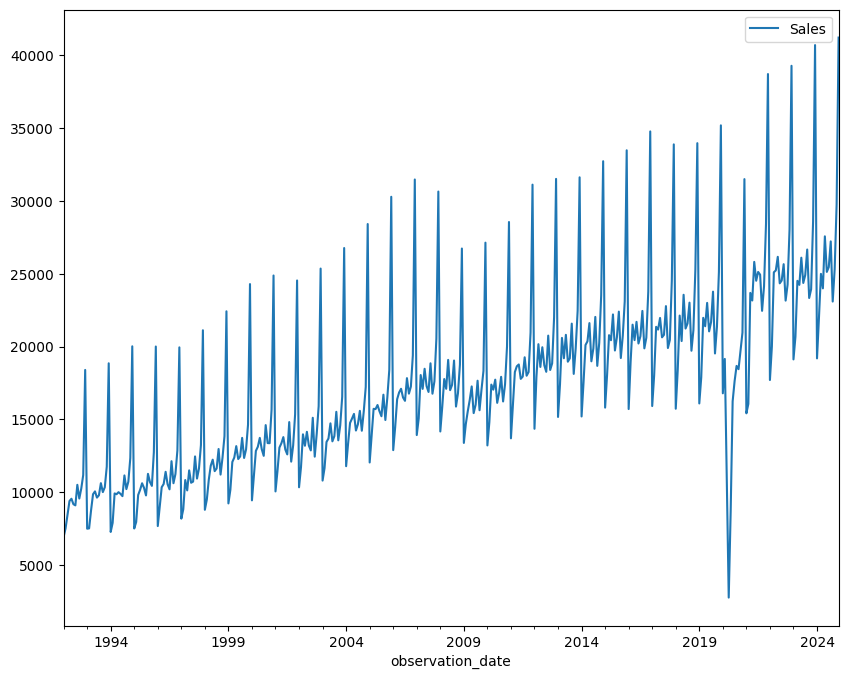

In [61]:
df.plot(figsize=(10,8))
plt.show()

Plot your data - Year vs Sales

hint: use df.plot  and plt.show()

____________![image.png](attachment:805024e0-d954-465a-b7e2-ddfb909885ff.png)

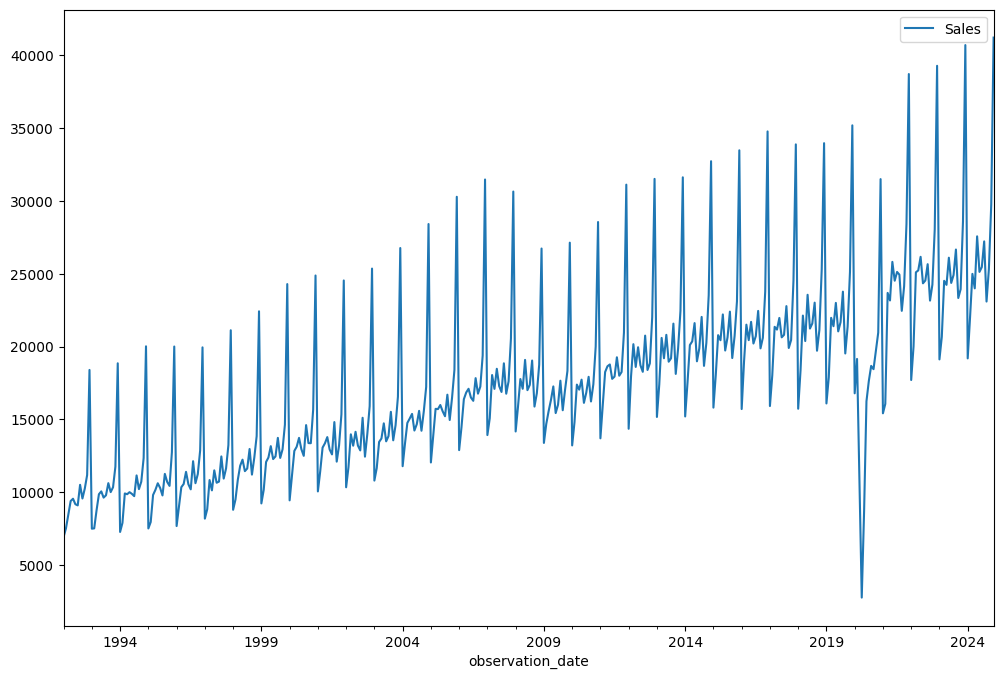

In [62]:
df.plot(figsize=(12,8))
plt.show()

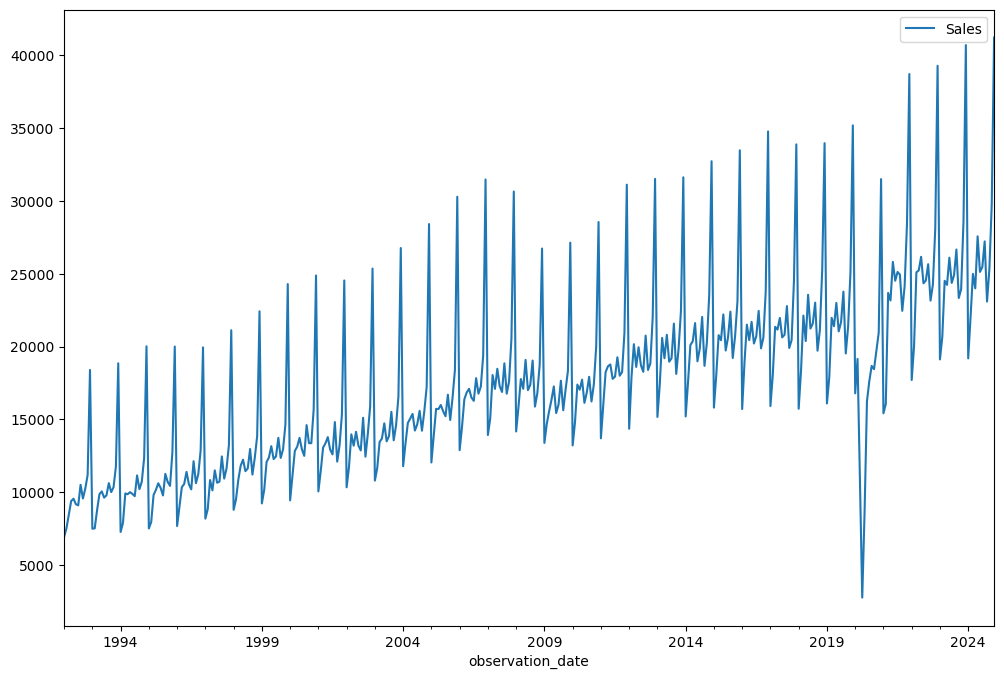

### Train Test Split

We will use the last 1.5 years (18 months) samples for testing. The rest is for training

______________![image.png](attachment:e38848db-d649-4cf7-a213-65b7f4afb347.png)

In [63]:
test_size = 18
test_size

18

18

__________![image.png](attachment:2c857cf3-2515-4517-9d3d-db350c691bf7.png)

In [64]:
data_length = len(df)
data_length

396

396

__________________![image.png](attachment:f8eaa367-9088-41f8-8b8b-9d268a0818ed.png)

In [65]:
train_size = data_length - test_size
train_size

378

378

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

____________________![image.png](attachment:91a08444-364a-40fa-a0c3-839197c15995.png)

In [66]:
test_index = train_size
test_index

378

378

Next, we will separate train and test datasets.

_________________________![image.png](attachment:3ae07221-155f-4716-9ea4-7484eb94dab4.png)

In [67]:
train = df.iloc[:test_index]
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


In [68]:
# Store everything from test_index to the last sample in the test variable
# Hint - Use df.iloc

# ...
# ...
test = df.iloc[test_index:]
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


In [69]:
# Print the size of the train data

# ...

# Print the size of the test data

# ...
print(train.size)
print(test.size)

378
18


378
18


### In Neural Networks, we need to Scale Data between 0-1

___________________![image.png](attachment:427170b6-570a-4740-b005-cd2e88a0f8b6.png)

In [70]:
from sklearn.preprocessing import MinMaxScaler

_______________________![image.png](attachment:b5ef2c4e-c013-4af5-9320-c48c58751458.png)

In [71]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

MinMaxScaler()

__________________![image.png](attachment:4e64d75b-6582-4975-bd2f-3881d943301d.png)

In [72]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [73]:
# Check if the data has been scaled properly
# Print max and min for train and test

# ...
# ...
# ...
# ...

print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0530599939704552
0.0
0.44980403979499545


1.0
1.0530599939704552
0.0
0.44980403979499545


## Time Series Generator

This class takes in a sequence of data points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

### We will use 12 months as input and then predict the next month out


_____________________![image.png](attachment:75eeec67-065a-4084-9a2b-c10207e20cba.png)

In [ ]:
pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [74]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#TimeseriesGenerator?

_________________![image.png](attachment:280feffa-2228-4562-9b29-005f579078ef.png)

In [75]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=1)

_______________________![image.png](attachment:6525f6be-465f-4f4c-8198-cad63a006c9b.png)

In [76]:
X,y = generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'predict this y: \n{y}')

Given the array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
predict this y: 
[[0.12952558]]


Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


### Create the Model

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

________________![image.png](attachment:aef51a9d-f017-45c3-a12d-2a77630a3721.png)

In [78]:
n_features = 1
n_features

1

1

## Define your own models.

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [107]:
# Your code to create your own model
# use input_shape=(length, n_features)
# use model.add(Dense(1)) because it is the regression task

# .....
# .....
# .....
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


model = Sequential()
model.add(LSTM(25, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

# Print the summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 25)                  │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,726 (10.65 KB)

 Trainable params: 2,726 (10.65 KB)

 Non-trainable params: 0 (0.00 B)

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

_____________________![image.png](attachment:5f040382-1621-443b-87a6-48ad7c9c995f.png)

In [108]:
model.compile(optimizer='adam',loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches.

Review the video on the Week-6 page for more info on this.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [109]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length=length, batch_size=1)

In [110]:
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 1

early_stop = EarlyStopping(monitor='val_loss',patience=1)


_____________________![image.png](attachment:e0ecd664-7df5-4386-a700-adb2228bf254.png)

In [111]:
history = model.fit(generator, epochs=100,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0420

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0420 - val_loss: 0.0529
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0125 - val_loss: 0.0432
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0139 - val_loss: 0.0299
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0134 - val_loss: 0.0186
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0083 - val_loss: 0.0069
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0095 - val_loss: 0.0184


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0364 - val_loss: 0.0283
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0124 - val_loss: 0.0153
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0118 - val_loss: 0.0010
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0047 - val_loss: 0.0127
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0042 - val_loss: 6.1039e-04
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0049 - val_loss: 6.4973e-04
Epoch 12/30
366/366 ━━━━━━━━━━━━

_____________![image.png](attachment:00bc3c6b-8d83-4d5c-80cc-1f586fc18bb3.png)

In [112]:
losses = pd.DataFrame(model.history.history)
losses[:5]

,loss,val_loss
0,0.021139,0.052861
1,0.014236,0.043234
2,0.013341,0.029945
3,0.011824,0.018609
4,0.010274,0.012668


In [ ]:
# the values may be different


,loss,val_loss
0,0.020090,0.028262
1,0.012648,0.015266
2,0.010198,0.001036
3,0.006880,0.003225
4,0.005237,0.012703


___________________![image.png](attachment:f4e5651a-8770-46d6-80cd-ad7c715e6fe4.png)

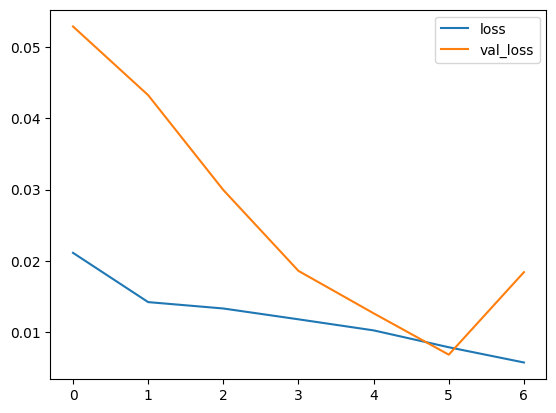

In [113]:
losses.plot()
plt.show();

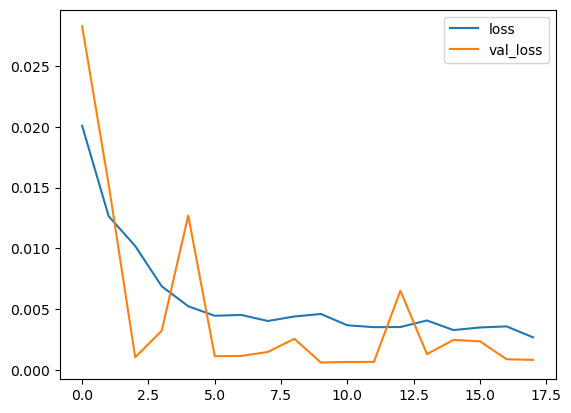

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

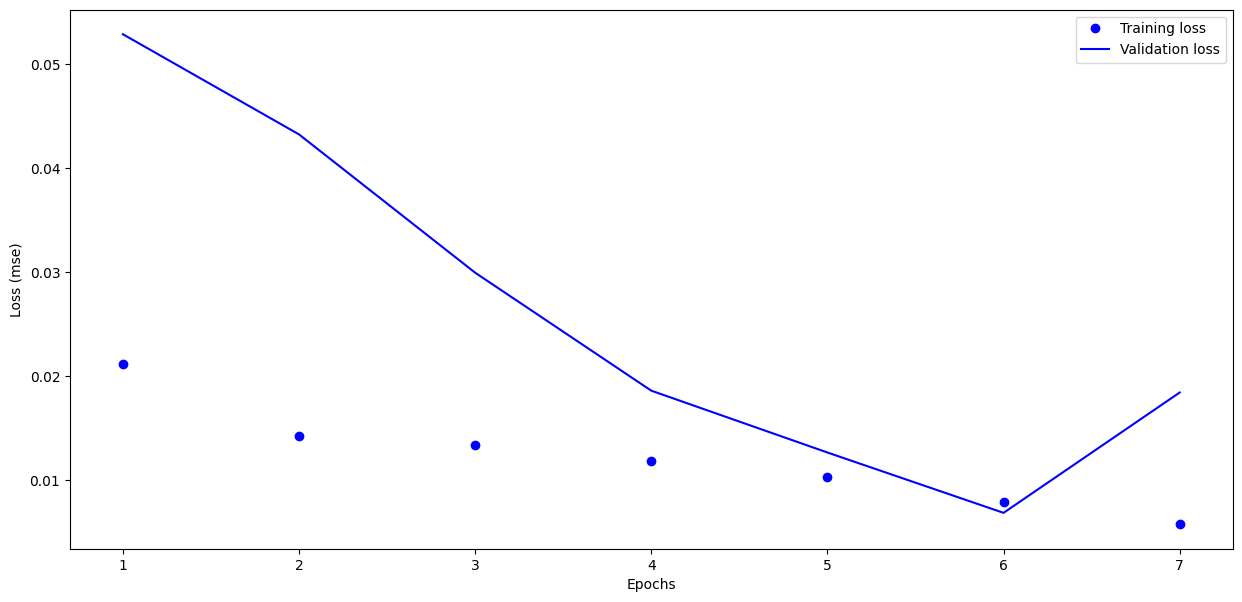

In [114]:
# print Loss for the neural network training process

history_dict = history.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

### Evaluate on Test Data

____________________![image.png](attachment:78ee4976-41bd-457c-8de2-ee2446e02523.png)

In [115]:
print(scaled_train[-15:])

[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


____________________![image.png](attachment:7c5efeb5-4631-462d-b593-f7ee0b22b63b.png)

In [116]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [117]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

___________________![image.png](attachment:a2b037af-2ff0-42ce-9234-7ee8a9abb742.png)

In [118]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


array([[0.7128612]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


array([[0.63285655]], dtype=float32)

_________________![image.png](attachment:b5adbbdd-43ed-4ee2-9417-382a709986b5.png)

In [119]:
scaled_test[0]

array([0.60665442])

array([0.60665442])

#### Try predicting the series!

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [120]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

In [121]:
for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [122]:
test_predictions

[array([0.7128612], dtype=float32),
 array([0.7545048], dtype=float32),
 array([0.6925036], dtype=float32),
 array([0.728069], dtype=float32),
 array([0.90607566], dtype=float32),
 array([1.2244532], dtype=float32),
 array([0.58307487], dtype=float32),
 array([0.61015785], dtype=float32),
 array([0.711129], dtype=float32),
 array([0.73875344], dtype=float32),
 array([0.8160372], dtype=float32),
 array([0.79628175], dtype=float32),
 array([0.9549734], dtype=float32),
 array([1.0312974], dtype=float32),
 array([0.95028394], dtype=float32),
 array([1.0141511], dtype=float32),
 array([1.3616722], dtype=float32),
 array([1.8991132], dtype=float32)]

### Inverse Transformations and Compare

_________________![image.png](attachment:9266da43-7b93-47a6-b135-724c546cf46b.png)

In [123]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[28786.16588581],
       [30305.61663187],
       [28043.3778137 ],
       [29341.05387288],
       [35835.98247558],
       [47452.62430358],
       [24050.6526987 ],
       [25038.82937825],
       [28722.96417779],
       [29730.89669216],
       [32550.74851513],
       [31829.93239361],
       [37620.11443263],
       [40404.94988656],
       [37449.01028687],
       [39779.3310523 ],
       [52459.33221173],
       [72068.94253492]])

array([[25867.03686076],
       [26708.37140393],
       [25016.20063967],
       [25854.56223851],
       [29340.47320271],
       [40268.42497611],
       [20830.97139931],
       [22252.6564256 ],
       [25053.23304337],
       [25580.6207518 ],
       [27142.1950959 ],
       [26136.75054663],
       [27203.31552541],
       [27836.48089719],
       [26630.20928335],
       [27364.5308798 ],
       [30701.01822633],
       [41377.06135786]])

_____________![image.png](attachment:1689e362-0bac-4c6c-a993-55ff6789ceb7.png)

In [124]:
test['Predictions'] = true_predictions

<ipython-input-124-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


C:\Users\vital\AppData\Local\Temp\ipykernel_18288\3095654106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


### Check and plot predictions

In [125]:
# Print the test variable

# ...
print(test)


                  Sales   Predictions
observation_date                     
2023-07-01        24911  28786.165886
2023-08-01        26657  30305.616632
2023-09-01        23332  28043.377814
2023-10-01        23933  29341.053873
2023-11-01        28580  35835.982476
2023-12-01        40684  47452.624304
2024-01-01        19188  24050.652699
2024-02-01        22005  25038.829378
2024-03-01        24986  28722.964178
2024-04-01        23993  29730.896692
2024-05-01        27562  32550.748515
2024-06-01        25121  31829.932394
2024-07-01        25453  37620.114433
2024-08-01        27215  40404.949887
2024-09-01        23088  37449.010287
2024-10-01        25318  39779.331052
2024-11-01        29762  52459.332212
2024-12-01        41199  72068.942535


,Sales,Predictions
observation_date,,
2023-07-01,24911,25867.036861
2023-08-01,26657,26708.371404
2023-09-01,23332,25016.200640
2023-10-01,23933,25854.562239
2023-11-01,28580,29340.473203
2023-12-01,40684,40268.424976
2024-01-01,19188,20830.971399
2024-02-01,22005,22252.656426
2024-03-01,24986,25053.233043


_______________![image.png](attachment:f62685ae-fe3d-45e4-b14c-32c3f876ee6c.png)

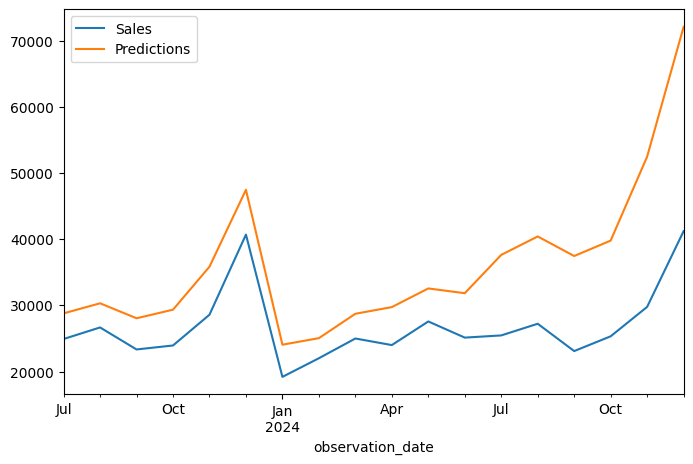

In [126]:
test.plot(figsize=(8,5))
plt.show()

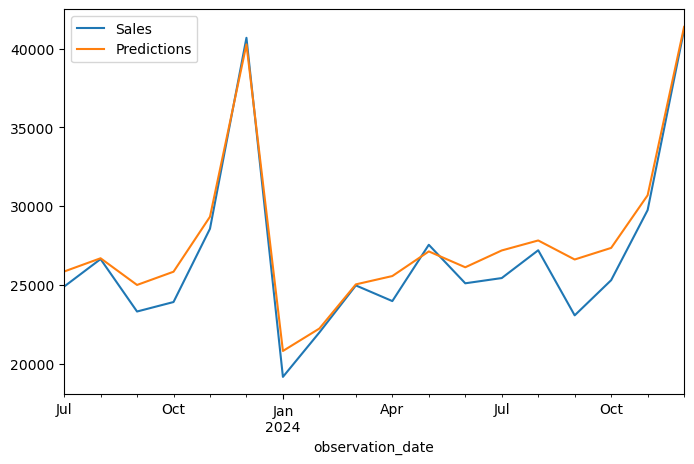

### Retrain and Forecasting

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [127]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [128]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [129]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data,
                                scaled_full_data, length=length, batch_size=1)

In [130]:
# Use any neural network model based on RNN
# You can also use the model created above
#
# Create the model

# ...
# ...
# ...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [131]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
# your code to compile the model

# ...
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [133]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 1

early_stop = EarlyStopping(monitor='val_loss',patience=1)


____________________![image.png](attachment:7b5b9107-f77e-4327-a987-878819f2ce45.png)

In [136]:
history_2 = model.fit(generator, epochs=30,
                      validation_data=validation_generator,
                      callbacks=[early_stop])

Epoch 1/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - val_loss: 0.0014


In [ ]:
# fit the model

history_2 =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

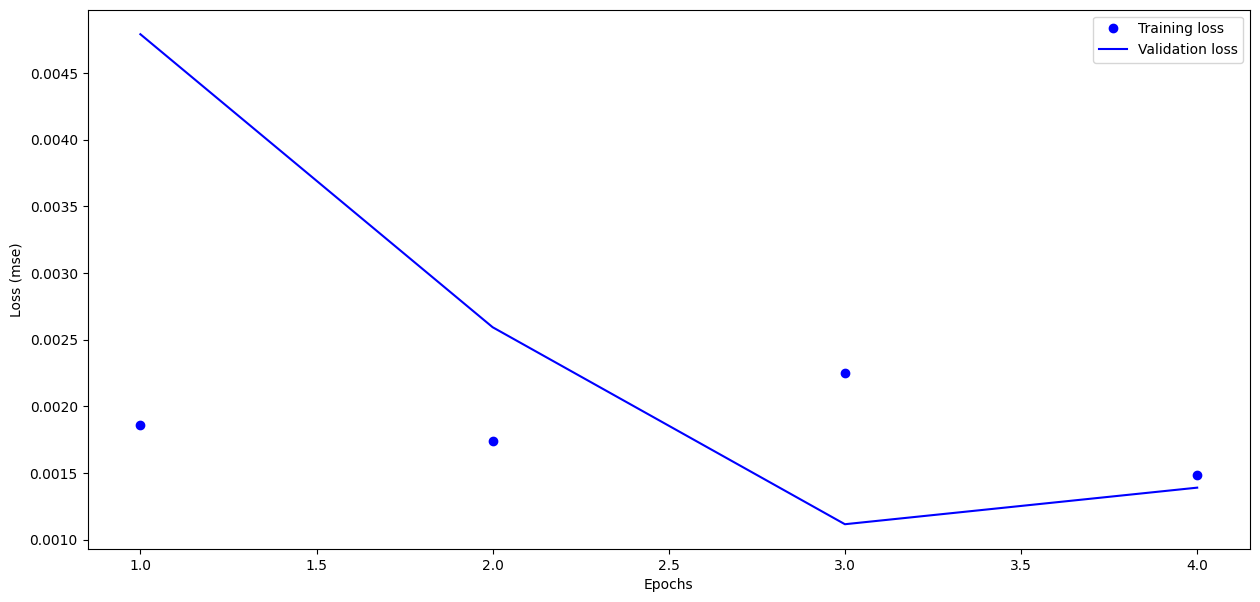

In [137]:
# print Loss for the neural network training process

history_dict = history_2.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [ ]:
# You can use the code created above to type the next cell code

_________________![image.png](attachment:02c09230-3aba-4573-8e73-6abd5e03c12a.png)

In [138]:
forecast=[]
periods=12
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


______________________![image.png](attachment:3072f528-93a6-486e-b230-a376ae174ea2.png)

In [140]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[22955.81973875],
       [22651.72037429],
       [23896.76640236],
       [22196.57934493],
       [24757.81328446],
       [23661.21221644],
       [23521.38814247],
       [23840.95029706],
       [21985.87871253],
       [22576.12016183],
       [24748.76396382],
       [35273.7436825 ]])

array([[18620.61448288],
       [20206.91406763],
       [22167.73939276],
       [21757.40348327],
       [23828.92585731],
       [22448.01823115],
       [22479.73978627],
       [23555.70857722],
       [21352.45454019],
       [22294.99097872],
       [25707.46347636],
       [37294.23667431]])

### Creating new timestamp index with pandas.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 4 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [141]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


In [142]:
forecast_index = pd.date_range(start='2025-01-01',periods=periods,freq='MS')

In [143]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [144]:
forecast_df

,Forecast
2025-01-01,22955.819739
2025-02-01,22651.720374
2025-03-01,23896.766402
2025-04-01,22196.579345
2025-05-01,24757.813284
2025-06-01,23661.212216
2025-07-01,23521.388142
2025-08-01,23840.950297
2025-09-01,21985.878713
2025-10-01,22576.120162


__________________![image.png](attachment:a493f4a8-33ea-440d-ad45-8d5a273f8dfb.png)

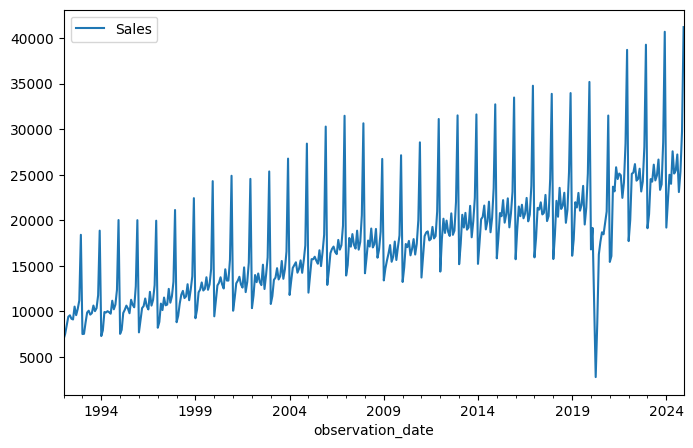

In [145]:
df.plot(figsize=(8,5))
plt.show();

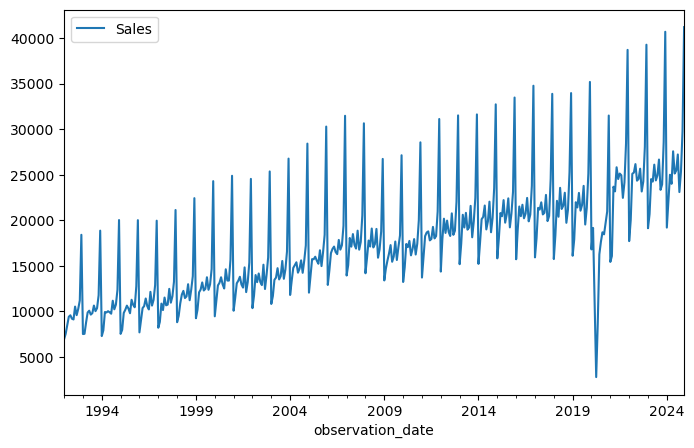

____________________![image.png](attachment:f61a4158-30b1-457d-9aaa-2945b1ec8833.png)

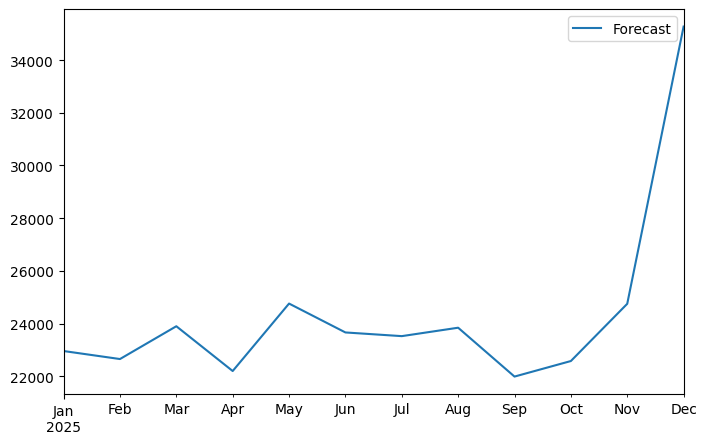

In [146]:
forecast_df.plot(figsize=(8,5))
plt.show;

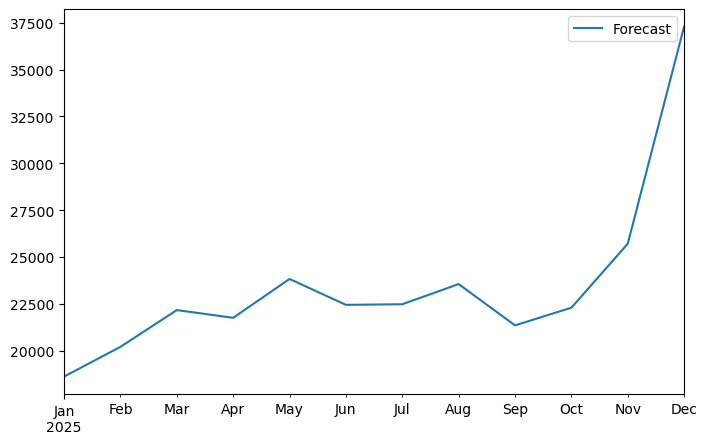

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

________________________![image.png](attachment:1ad9f420-c284-4442-8931-039f36b4390a.png)

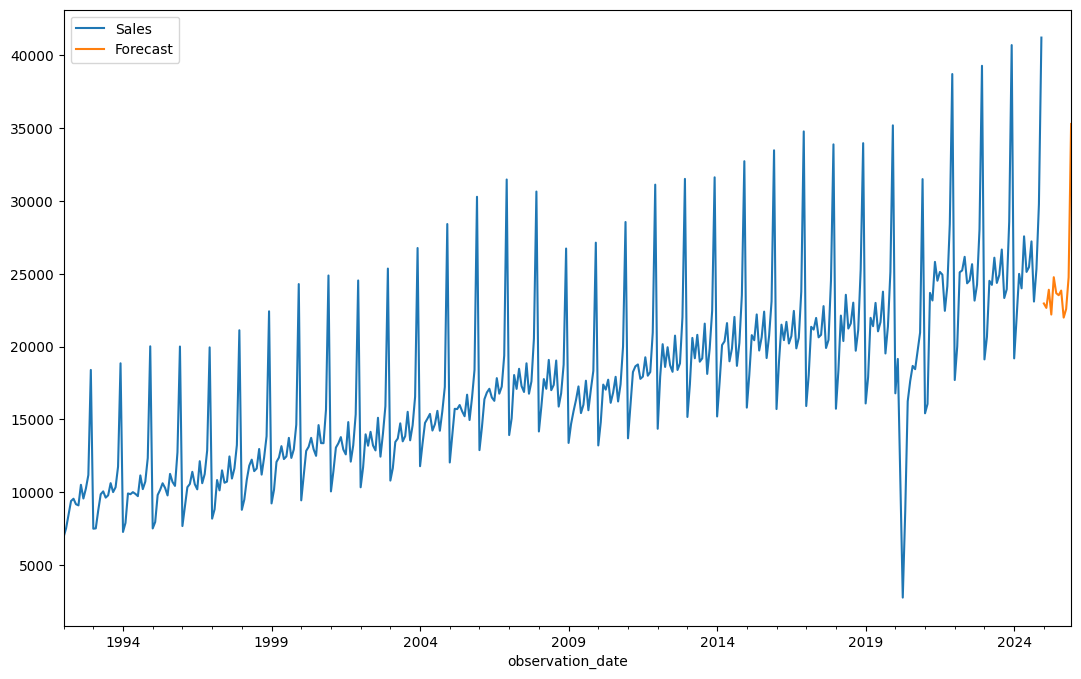

In [147]:
ax= df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.show();


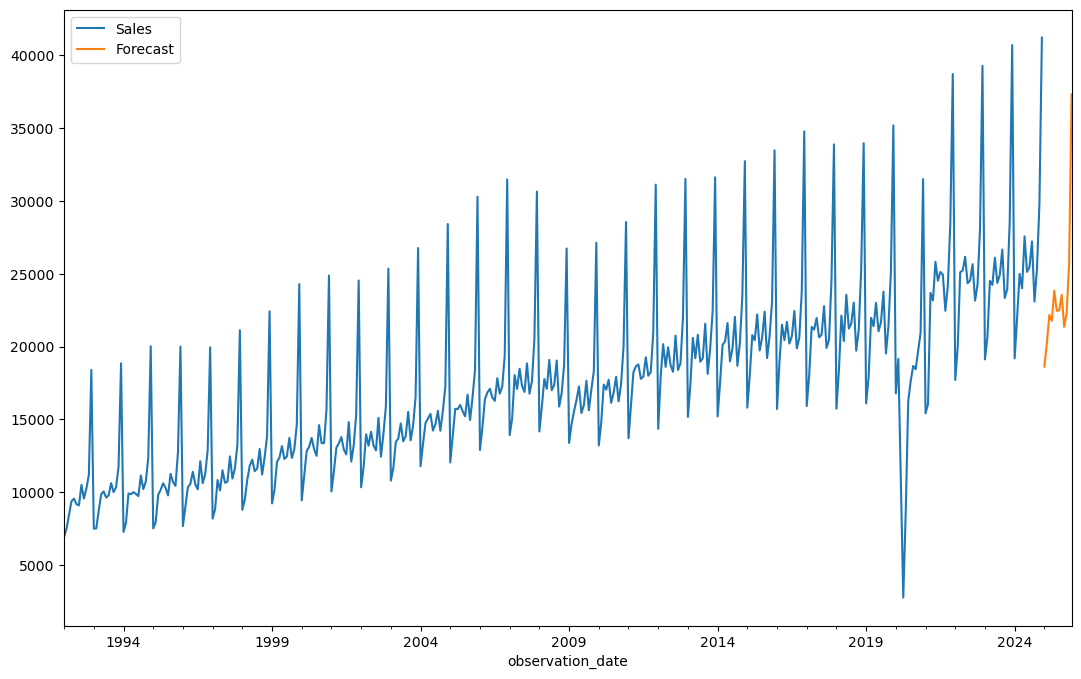

_______![image.png](attachment:5611350d-0e2b-4867-9b54-de812a2abd8a.png)

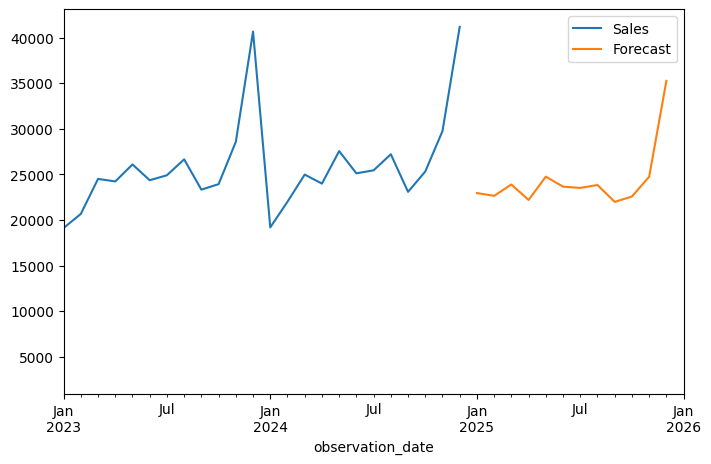

In [148]:
ax = df.plot(figsize=(8,5))
forecast_df.plot(ax=ax)
plt.xlim('2023-01-01','2026-01-01')
plt.show();

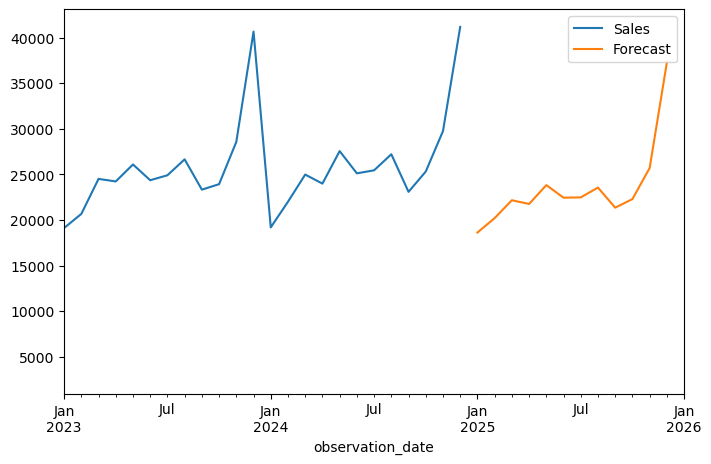

### Cecking Forecast for last 12 months

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [149]:
forecast_index = pd.date_range(start='2024-01-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [150]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

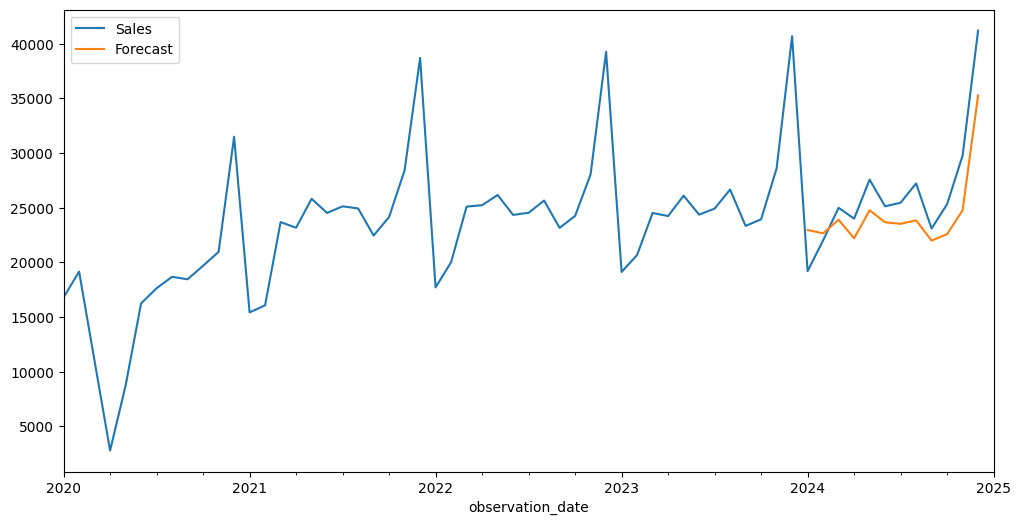

In [151]:
ax = df.plot(figsize=(12,6))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2025-01-01')
plt.show();

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the 2nd model's summary

### 2. Copy your early-stop code and history_2 fit-training-process

### 3. Please record the plot of validation and test loss of history_2.

### 4. Based on this analysis, determine the optimal number of epochs for training your model.

### Try the same example with a LSTM and GRU! (Optional)
Hint: Use LSTM instead of SimpleRNN!